In [1]:
import numpy as np 
from sklearn.manifold import TSNE as t_sne
from sklearn.datasets import make_swiss_roll 
from sklearn.manifold import LocallyLinearEmbedding as lle
import matplotlib.pyplot as plt

# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D

%matplotlib inline 

from ipywidgets import *
import pickle
import time


from plot_functions import *
import helpers as HL


# Section III B-2: Applying the Algorithms, t-SNE

In this section, an ordinary Swiss roll with 1000 data points and noise set to 0.01 is used. The effect of the  hyperparameters for t-SNE are explored. 

## Importing and plotting the data set: 

In [2]:
X, color=HL.make_swissroll(n=1000, noise=0.01)

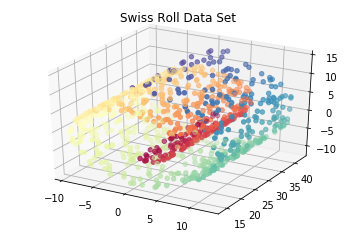

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Swiss Roll Data Set")
plt.savefig('dataset.pdf')
plt.show()

## Applying t-SNE

We want to apply the t-SNE algorithm, and play around with the hyperparameters.

# Analysing the effect of perpexity

In [4]:
"""Want to make an interactive plot with a wide range of perplexities. In order to do that we first create a list, Z,
consisting of a trnsformation for each perpelxity. It takes some time to create all of the transformations, therefore 
we have made them available in a pickle"""

per=np.arange(2,150,2) 
create=False
if create: 
    p_Z=[]
    p_times=np.zeros(len(per))
    p_kl_divergence=np.zeros(len(per))
    for i, p in enumerate(per):
        tsne=t_sne(perplexity=p)
        start_time=time.time()
        p_Z.append(tsne.fit_transform(X))
        p_times[i]= time.time()-start_time
        p_kl_divergence[i]=tsne.kl_divergence_
    pickle.dump( p_Z, open("p_Z_tsne.pkl", "wb")) 
    pickle.dump(color, open("color.pkl","wb"))
    pickle.dump(per, open("per.pkl","wb"))
    pickle.dump(p_times, open("p_times.pkl","wb"))
    pickle.dump(p_kl_divergence, open("p_kl_divergence.pkl","wb"))
else: 
    p_Z= pickle.load(open("p_Z_tsne.pkl", "rb"))
    color=pickle.load(open("color.pkl", "rb"))
    per=pickle.load(open("per.pkl", "rb"))
    p_times=pickle.load(open("p_times.pkl", "rb"))
    p_kl_divergence=pickle.load(open("p_kl_divergence.pkl", "rb"))

In [5]:
interactive(plot_inter, Z=fixed(p_Z), color=fixed(color),var=fixed(per),transformation=fixed('t-sne'), variable=fixed('per'), i=widgets.IntSlider(min=0,max=len(per)-1,step=1, value=0))



/Users/HeddaVik/anaconda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


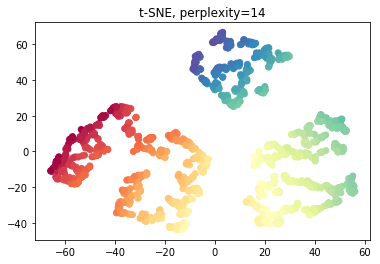

In [6]:
plot_and_save_tsne(14, "per14.pdf",color=color, Z=p_Z)

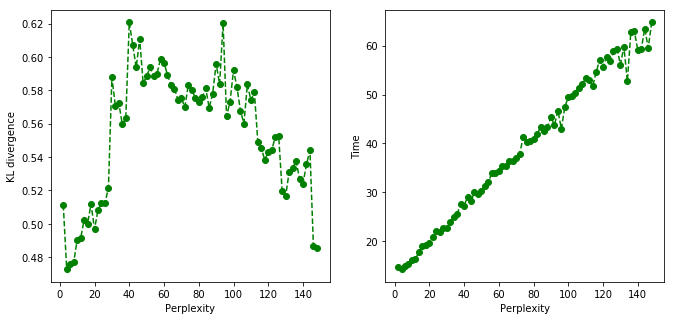

In [7]:
plot_error_and_time(per, p_kl_divergence,p_times, variable="Perplexity", error_type='KL divergence', filename=False)

# Analysing the effect of early exaggeration

In [8]:
early_exaggeration=np.arange(1,80,1) 
create=False
if create: 
    e_Z=[]
    e_times=np.zeros(len(early_exaggeration))
    e_kl_divergence=np.zeros(len(early_exaggeration))
    for i, e in enumerate(early_exaggeration):
        tsne=t_sne(early_exaggeration=e)
        start_time=time.time()
        e_Z.append(tsne.fit_transform(X))
        e_times[i]= time.time()-start_time
        e_kl_divergence[i]=tsne.kl_divergence_
    pickle.dump( e_Z, open("e_Z_tsne.pkl", "wb")) 
    pickle.dump(color, open("color.pkl","wb"))
    pickle.dump(early_exaggeration, open("early_exaggeration.pkl","wb"))
    pickle.dump(e_times, open("e_times.pkl","wb"))
    pickle.dump(e_kl_divergence, open("e_kl_divergence.pkl","wb"))
else: 
    e_Z= pickle.load(open("e_Z_tsne.pkl", "rb"))
    color=pickle.load(open("color.pkl", "rb"))
    early_exaggeration=pickle.load(open("early_exaggeration.pkl", "rb"))
    e_times=pickle.load(open("e_times.pkl", "rb"))
    e_kl_divergence=pickle.load(open("e_kl_divergence.pkl", "rb"))

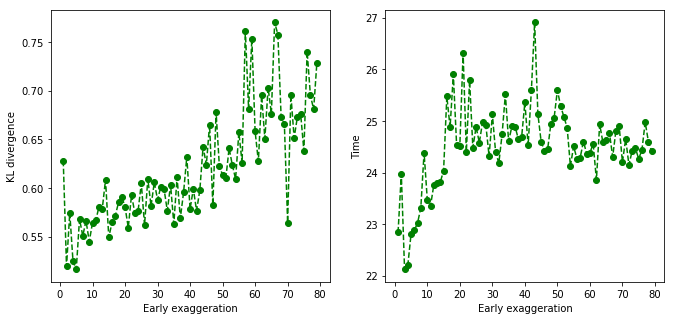

In [9]:
plot_error_and_time(early_exaggeration, e_kl_divergence,e_times, variable="Early exaggeration", error_type='KL divergence',filename=False)

In [10]:


interactive(plot_inter, Z=fixed(e_Z), color=fixed(color),var=fixed(early_exaggeration),transformation=fixed('t-sne'), variable=fixed('early_exaggeration'), i=widgets.IntSlider(min=0,max=len(early_exaggeration)-1,step=1, value=0))




/Users/HeddaVik/anaconda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


# Analysing the effect of learning rate

In [11]:
learning_rates=np.arange(5,1000,5) 
create=False
if create: 
    p=24
    l_Z=[]
    l_times=np.zeros(len(learning_rates))
    l_kl_divergence=np.zeros(len(learning_rates))
    for i, l in enumerate(learning_rates):
        tsne=t_sne(perplexity=p, learning_rate=l)
        start_time=time.time()
        l_Z.append(tsne.fit_transform(X))
        l_times[i]= time.time()-start_time
        l_kl_divergence[i]=tsne.kl_divergence_
    pickle.dump( l_Z, open("l_Z_tsne.pkl", "wb")) 
    pickle.dump(color, open("color.pkl","wb"))
    pickle.dump(learning_rates, open("learning_rates.pkl","wb"))
    pickle.dump(l_times, open("l_times.pkl","wb"))
    pickle.dump(l_kl_divergence, open("l_kl_divergence.pkl","wb"))
else: 
    l_Z= pickle.load(open("l_Z_tsne.pkl", "rb"))
    color=pickle.load(open("color.pkl", "rb"))
    learning_rates=pickle.load(open("learning_rates.pkl", "rb"))
    l_times=pickle.load(open("l_times.pkl", "rb"))
    l_kl_divergence=pickle.load(open("l_kl_divergence.pkl", "rb"))

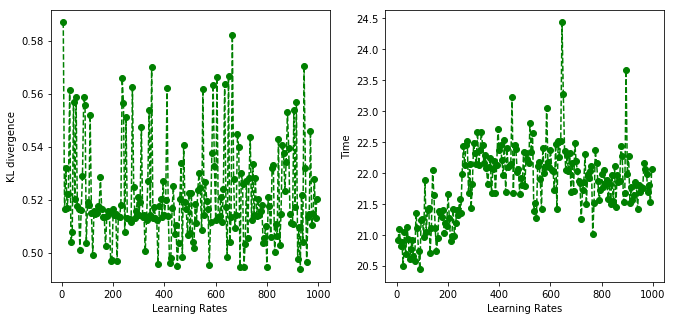

In [12]:
plot_error_and_time(learning_rates, l_kl_divergence,l_times, variable="Learning Rates",error_type='KL divergence', filename=False)

In [13]:
interactive(plot_inter,transformation=fixed('t-sne'), Z=fixed(l_Z), color=fixed(color),var=fixed(learning_rates),variable=fixed('learning_rate'), i=widgets.IntSlider(min=0,max=len(learning_rates)-1,step=1, value=0))

/Users/HeddaVik/anaconda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


# Analysing the effect of threshold on norm of gradient

In [14]:
threshold=np.logspace(-14,-1,50) 
create=False
if create: 
    p=24
    t_Z=[]
    t_times=np.zeros(len(threshold))
    t_kl_divergence=np.zeros(len(threshold))
    for i, t in enumerate(threshold):
        tsne=t_sne(perplexity=p, min_grad_norm=t)
        start_time=time.time()
        t_Z.append(tsne.fit_transform(X))
        t_times[i]= time.time()-start_time
        t_kl_divergence[i]=tsne.kl_divergence_
    pickle.dump( t_Z, open("t_Z_tsne.pkl", "wb")) 
    pickle.dump(color, open("color.pkl","wb"))
    pickle.dump(threshold, open("threshold.pkl","wb"))
    pickle.dump(t_times, open("t_times.pkl","wb"))
    pickle.dump(t_kl_divergence, open("t_kl_divergence.pkl","wb"))
else: 
    t_Z= pickle.load(open("t_Z_tsne.pkl", "rb"))
    color=pickle.load(open("color.pkl", "rb"))
    threshold=pickle.load(open("threshold.pkl", "rb"))
    t_times=pickle.load(open("t_times.pkl", "rb"))
    t_kl_divergence=pickle.load(open("t_kl_divergence.pkl", "rb"))

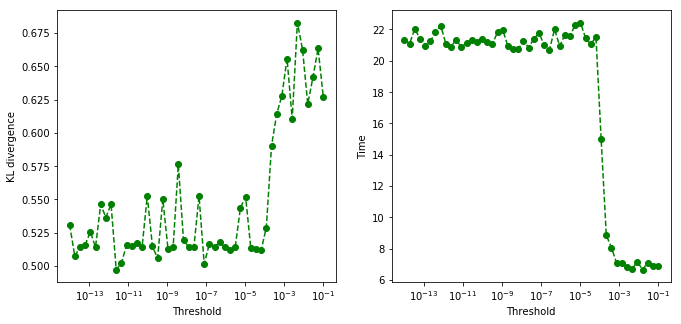

In [15]:
plot_error_and_time(threshold, t_kl_divergence,t_times, variable="Threshold",error_type='KL divergence',  filename=False)

In [16]:
interactive(plot_inter,transformation=fixed('t-sne'), Z=fixed(t_Z), color=fixed(color),var=fixed(threshold),variable=fixed('threshold'), i=widgets.IntSlider(min=0,max=len(threshold)-1,step=1, value=0))

/Users/HeddaVik/anaconda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)
